# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


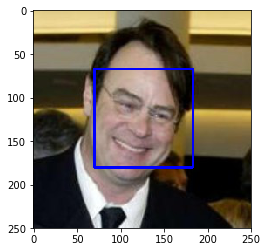

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Percent humans correctly detected in human images: 98%.

Percent humans incorrectly detected in dog images: 17%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans_in_human_imgs = 0 # counter variable for humans correctly detected in human images
humans_in_dog_imgs = 0 # counter variable for humans incorrectly detected in dog images
for human_img, dog_img in zip(human_files_short, dog_files_short):
    # add 1 to count of human detection in human images
    if face_detector(human_img):
        humans_in_human_imgs += 1
    # add 1 to count of human detection in dog images
    if face_detector(dog_img):
        humans_in_dog_imgs += 1

print('Percent humans correctly detected in human images: {}%'.format((humans_in_human_imgs/len(human_files_short))*100))
print('Percent humans incorrectly detected in dog images: {}%'.format((humans_in_dog_imgs/len(dog_files_short))*100))


Percent humans correctly detected in human images: 98.0%
Percent humans incorrectly detected in dog images: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# instruct device to use cpu
device = torch.device("cpu")

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    device = torch.device("cuda")
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:23<00:00, 23116631.31it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    
    # configure the transform you would like to apply to the image so VGG16 can accept it
    transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    
    img = transform(img).to(device)
    
    # add a depth dimension to simulate a 'batch' of images that the VGG16 model is designed to accept
    img.unsqueeze_(0)

    # run the model to retrieve 'scores' for each class prediction a then get the class index value with the highest score
    predicted_class = VGG16(img).cpu().data.numpy().argmax()
    
    return predicted_class

VGG16_predict('images/Brittany_02625.jpg')

215

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    
    # Get the predicted class index...anyting between 151-268 inclusive is a dog
    class_index = VGG16_predict(img_path)
    
    is_dog = False
    if class_index >= 151 and class_index <= 268:
        is_dog = True
        
    return is_dog

dog_detector('images/Brittany_02625.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Percent dogs incorrectly detected in human images: 1.0%

Percent dogs correctly detected in dog images: 98.0%

In [9]:
### DONE: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs_in_human_imgs = 0 # counter variable for dogs incorrectly detected in human images
dogs_in_dog_imgs = 0 # counter variable for dogs correctly detected in dog images
for human_img, dog_img in zip(human_files_short, dog_files_short):
    # add 1 to count of human detection in human images
    if dog_detector(dog_img):
        dogs_in_dog_imgs += 1
    # add 1 to count of human detection in dog images
    if dog_detector(human_img):
        dogs_in_human_imgs += 1

print('Percent dogs incorrectly detected in human images: {}%'.format((dogs_in_human_imgs/len(human_files_short))*100))
print('Percent dogs correctly detected in dog images: {}%'.format((dogs_in_dog_imgs/len(dog_files_short))*100))


Percent dogs incorrectly detected in human images: 3.0%
Percent dogs correctly detected in dog images: 98.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 60

transform_train = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomRotation(20), 
                                transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                ])
transform_test = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                ])

data = {}
data['train'] = datasets.ImageFolder('/data/dog_images/train', transform=transform_train)
data['valid'] = datasets.ImageFolder('/data/dog_images/valid', transform=transform_test)
data['test'] = datasets.ImageFolder('/data/dog_images/test', transform=transform_test)

loaders_scratch = {}
loaders_scratch['train'] = torch.utils.data.DataLoader(data['train'], batch_size=batch_size,
                                                   num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(data['valid'], batch_size=batch_size,
                                                   num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(data['test'], batch_size=batch_size,
                                                 num_workers=num_workers)

Below code will load and display 20 images from the training set along with their class

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

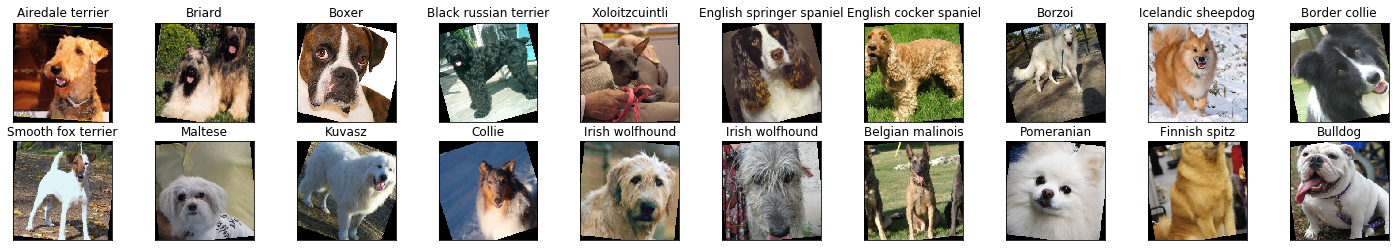

In [13]:
# obtain one batch of training images
dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# retieve class names
class_names = [item[4:].replace("_", " ") for item in data['train'].classes]

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[labels[idx].item()])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

My code resizes the images by scaling their size to 255x255, then center cropping them to 224x224, and normalizing them using the standard mean/stddev of 0.5/0.5. I chose to pick these values so my model can evalue small pixel images (less resource utilization).

I also chose to augment the images by using a random horizontal flip with 50% probability to increase the variety in training data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

# Khalid's Notes
Links referenced:

https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/

http://blizzard.cs.uwaterloo.ca/iss4e/wp-content/uploads/2017/10/yerbol_aussat_cs698_project_report.pdf

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

https://classroom.udacity.com/nanodegrees/nd101/parts/2e8d3b5d-aa70-4376-946f-0cdc37127d7d/modules/19a75d10-547d-4497-ae68-609ca1a235fc/lessons/807590ea-abd5-4581-b91d-9eede9a0aad2/concepts/3d87c586-5dae-4eb4-85a1-01f3151a025f

https://towardsdatascience.com/a-beginners-tutorial-on-building-an-ai-image-classifier-using-pytorch-6f85cb69cba7


In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # maxpool layer
        self.pool = nn.MaxPool2d(2,2)
        
        # drop out layer
        self.dropout = nn.Dropout(0.5)
        
        # conv1 layer 224x224x3 --> 224x224x16
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        
        # conv2 layer (maxpool applied) 112x112x16 --> 112x112x32
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        # conv3 layer (maxpool applied) 56x56x32 --> 56x56x64
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        # conv4 layer (maxpool applied) 56x56x64 --> 28x28x128
        #self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        # fc1 layer (maxpool applied) 14x14x128 --> 500
        self.fc1 = nn.Linear(28 * 28 * 64, 1500)
        
        # fc2 layer 500 --> 1000
        self.fc2 = nn.Linear(1500, 1000)
    
    def forward(self, x):
        ## Define forward behavior
        # sequence of conv and maxpooling layers with relu activation function
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #x = self.pool(F.relu(self.conv4(x)))
        
        # flatten the image
        x = x.view(-1, 28 * 28 * 64)
        
        # add dropout
        x = self.dropout(x)
        
        # first fully connected layer (fc1) with relu activation function
        x = F.relu(self.fc1(x))
        
        # add dropout
        x = self.dropout(x)
        
        # second fully connected layer (fc2) with relu activation function
        x = F.relu(self.fc2(x))
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
1. I referenced previous Udacity lessons, online resources, etc for general architecture guidance
2. I started off with 4 convolution layers, each followed by a max pooling layer, then 2 fully connected layers, each preceeded by a dropout (p=0.25) layer. This model kept overfitting the training set even after I modified the dropout to be more aggressive at (p=0.5). Best case scenario provided 11 % accuracy on the training set.
3. I reduced the convolutional and max pooling layers to 3 each, but the effect was minimal. I decided to keep this simplified model since the reduction in layers will allow it to train faster.
4. I then tested the effect of training with a larger learning rate (from 0.001 to 0.01) and was astonished to find the test set accuracy went up to 14%. My understanding is that a smaller learning rate will train slower (given smaller gradient decent steps) but will be more accurate at landing closer to the minima. So the only justification I can think of for a higher learning rate leading to an incrase in accuracy is that the gradient decent steps overshot local minima and landed in an even lower minima nearby.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
### Training variables
# parameters
lr_scratch = 0.01 # changing learning rate from 0.001 to 0.01 improved performance from 11% to 14% test accuracy
momentum_scratch = 0.9
n_epochs_scratch = 50

# save the model
save_path_scratch = 'model_scratch.pt'
abort_after_no_loss_streak_scratch = 10 # abort training if X of epochs progress without a decrease in validation loss

In [16]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=lr_scratch, momentum=momentum_scratch)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, abort_after_no_loss_streak):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    # initialize list to track loss in each epoch
    epoch_train_loss = []
    epoch_valid_loss = []
    
    # initialize values to determine when the model should abort training given a continuous lack of drop in loss
    no_loss_streak = 0

    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        train_correct = 0
        train_total = 0
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # perform an optimizatin step, or parameter update
            optimizer.step()
            
            # update training loss
            train_loss += loss.item() * data.size(0)
            
            ## Calculate accuracy on training data
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            
            # compare predictions to true label
            train_correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            
            # increase size of total data trained so far
            train_total += data.size(0)
        
        # calculate model accuracy on training data so far
        train_accuracy = train_correct/train_total
            
        ######################    
        # validate the model #
        ######################
        valid_correct = 0
        valid_total = 0
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # update validation loss
            valid_loss += loss.item() * data.size(0)
            
            ## Calculate validation accuracy
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            
            # compare predictions to true label
            valid_correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            
            # increase size of total validation data trained so far
            valid_total += data.size(0)
        
        # calculate model accuracy on validation data so far
        valid_accuracy = valid_correct/valid_total
            
        # cacluate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # append the training and validation loss to the epoch loss list for plotting
        epoch_train_loss.append(train_loss)
        epoch_valid_loss.append(valid_loss)
        
        # print training and validation statistics 
        print('Epoch: {}\t[TRAIN loss: {:.6f} accuracy: {:.6f}%]\t[VALID loss: {:.6f} accuracy {:.6f}%]'.format(
            epoch, 
            train_loss,
            train_accuracy * 100,
            valid_loss,
            valid_accuracy * 100
            ))
        
        ## DONE: save the model if validation loss has decreased, and abort if there is a long streak of no loss
        if valid_loss < valid_loss_min:
            # print statistics on how the model is training
            print('Validation loss has decreased ({:.6f} --> {:.6f}). Saving model to {}\n'.format(
                valid_loss_min, valid_loss, save_path))
            
            # save model
            torch.save(model.state_dict(), save_path)
            
            # update the validation loss variables
            valid_loss_min = valid_loss
            
            # reset the loss streak
            no_loss_streak = 0
            

        else:
            # if there is no loss in validation, increment the no_loss streak
            no_loss_streak += 1
            
            # if there too many no_loss streaks, abort training
            if no_loss_streak == abort_after_no_loss_streak:
                print('1. Aborting training due to a no validation loss streak of: {}'.format(abort_after_no_loss_streak))
                break
                
    # plot the average train and valid losses 
    plt.plot(epoch_train_loss)
    plt.plot(epoch_valid_loss)
    plt.title('Train VS Valid Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train loss', 'valid loss'], loc='upper right')
    plt.show()
    
    # return trained model
    return model


Epoch: 1	[TRAIN loss: 5.793681 accuracy: 0.793413%]	[VALID loss: 5.147324 accuracy 0.838323%]
Validation loss has decreased (inf --> 5.147324). Saving model to model_scratch.pt

Epoch: 2	[TRAIN loss: 4.993775 accuracy: 2.050898%]	[VALID loss: 4.739239 accuracy 2.395210%]
Validation loss has decreased (5.147324 --> 4.739239). Saving model to model_scratch.pt

Epoch: 3	[TRAIN loss: 4.691359 accuracy: 3.637725%]	[VALID loss: 4.556983 accuracy 4.431138%]
Validation loss has decreased (4.739239 --> 4.556983). Saving model to model_scratch.pt

Epoch: 4	[TRAIN loss: 4.510950 accuracy: 4.850299%]	[VALID loss: 4.455262 accuracy 3.952096%]
Validation loss has decreased (4.556983 --> 4.455262). Saving model to model_scratch.pt

Epoch: 5	[TRAIN loss: 4.379914 accuracy: 5.419162%]	[VALID loss: 4.353825 accuracy 6.107784%]
Validation loss has decreased (4.455262 --> 4.353825). Saving model to model_scratch.pt

Epoch: 6	[TRAIN loss: 4.276614 accuracy: 6.676647%]	[VALID loss: 4.300960 accuracy 7.18562

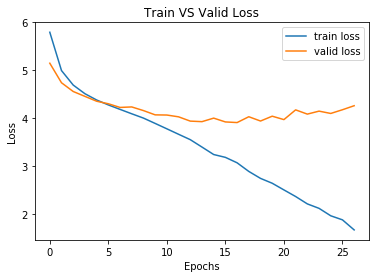

In [18]:
# train the model
model_scratch = train(n_epochs_scratch, loaders_scratch, model_scratch, optimizer_scratch, 
                     criterion_scratch, use_cuda, save_path_scratch, abort_after_no_loss_streak_scratch)

In [19]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.856091


Test Accuracy: 15% (127/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## DONE: Specify data loaders
import os
from torchvision import datasets

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 60

transform_train = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomRotation(20), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                #transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                ])
transform_test = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                #transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                ])

data_transfer = {}
data_transfer['train'] = datasets.ImageFolder('/data/dog_images/train', transform=transform_train)
data_transfer['valid'] = datasets.ImageFolder('/data/dog_images/valid', transform=transform_test)
data_transfer['test'] = datasets.ImageFolder('/data/dog_images/test', transform=transform_test)

loaders_transfer = {}
loaders_transfer['train'] = torch.utils.data.DataLoader(data_transfer['train'], batch_size=batch_size,
                                                   num_workers=num_workers, shuffle=True)
loaders_transfer['valid'] = torch.utils.data.DataLoader(data_transfer['valid'], batch_size=batch_size,
                                                   num_workers=num_workers, shuffle=True)
loaders_transfer['test'] = torch.utils.data.DataLoader(data_transfer['test'], batch_size=batch_size,
                                                 num_workers=num_workers)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
### Training variables
# parameters
lr_transfer = 0.01 # changing learning rate from 0.001 to 0.01 improved performance from 11% to 14% test accuracy
momentum_transfer = 0.9 # not currently used
n_epochs_transfer = 50

# save the model
save_path_transfer = 'model_transfer.pt'
abort_after_no_loss_streak_transfer = 10 # abort training if X of epochs progress without a decrease in validation loss

In [23]:
import torchvision.models as models
import torch.nn as nn

## DONE: Specify model architecture 
# load pretrained model from pytorch
model_transfer = models.resnet50(pretrained=True)

# freeze training for all features layers
for param in model_transfer.parameters():
    param.requires_grad = False
    
for param in model_transfer.fc.parameters():
    param.requires_grad = True

model_transfer.fc.out_features = 1000

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 82798193.75it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1. I decided to leverage the resnet50 architecture since I have never worked with it before
2. I downloaded a pretrained image of the model
3. I froze all the parameters to prevent back propogation from adjusting the weights
4. I unfroze the fully connected layer parameters so that they can be trained
5. I updated the output layer to 1000 nodes to match the number of possible prediction classes, which is 1000 in this case.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=lr_transfer)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

Epoch: 1	[TRAIN loss: 8.765855 accuracy: 0.164671%]	[VALID loss: 6.822536 accuracy 0.958084%]
Validation loss has decreased (inf --> 6.822536). Saving model to model_transfer.pt

Epoch: 2	[TRAIN loss: 5.482084 accuracy: 3.128743%]	[VALID loss: 4.865328 accuracy 6.706587%]
Validation loss has decreased (6.822536 --> 4.865328). Saving model to model_transfer.pt

Epoch: 3	[TRAIN loss: 4.251442 accuracy: 10.718563%]	[VALID loss: 3.881431 accuracy 15.209581%]
Validation loss has decreased (4.865328 --> 3.881431). Saving model to model_transfer.pt

Epoch: 4	[TRAIN loss: 3.511210 accuracy: 21.526946%]	[VALID loss: 3.202503 accuracy 26.347305%]
Validation loss has decreased (3.881431 --> 3.202503). Saving model to model_transfer.pt

Epoch: 5	[TRAIN loss: 2.948752 accuracy: 31.347305%]	[VALID loss: 2.713074 accuracy 35.568862%]
Validation loss has decreased (3.202503 --> 2.713074). Saving model to model_transfer.pt

Epoch: 6	[TRAIN loss: 2.562484 accuracy: 40.029940%]	[VALID loss: 2.344244 accu

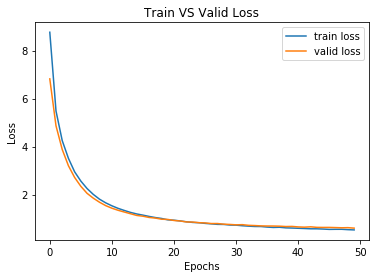

In [25]:
# train the model
model_transfer = train(n_epochs_transfer, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, save_path_transfer, abort_after_no_loss_streak_transfer)


In [26]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.636101


Test Accuracy: 81% (682/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # laod model checkpoint
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    
    # load image
    img = Image.open(img_path)
    
    # transform image to match model
    transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomRotation(20), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                #transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                ])
    
    # move image to gpu if it's available
    img = transform(img).to(device)
    
    # add a depth dimension to simulate a 'batch' of images that the model is designed to accept
    img.unsqueeze_(0)
    
    # pass image through model to predict scores for the different class id
    predicted_class = model_transfer(img).cpu().data.numpy().argmax()
    
    # return class name by passing class id
    class_name = class_names[predicted_class]
    
    return class_name

predict_breed_transfer('images/Brittany_02625.jpg')

'Brittany'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm


Awww look at that cute doggo!


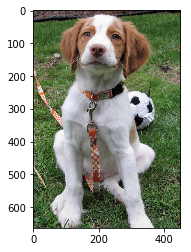

It looks like a Brittany to me! Am I Right?


In [29]:
### DONE: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither

    ## Print output depending on whether dog, human, or neither is detected
    
    # if dog, return predicted breed
    if dog_detector(img_path):
        breed = predict_breed_transfer(img_path)
        # print header
        print("\nAwww look at that cute doggo!")
        
        ## show image
        # convert file to path to PIL image
        image = Image.open(img_path)
        # display image in plot
        plt.figure()
        plt.imshow(image)
        plt.show()
    
        # print footer
        print("It looks like a {} to me! Am I Right?".format(breed))
    
    # else if human, return resembling dog breed
    elif face_detector(img_path):
        # print header
        print("\nThat's not a doggo!")
        
        ## show image
        # convert file to path to PIL image
        image = Image.open(img_path)
        # display image in plot
        plt.figure()
        plt.imshow(image)
        plt.show()
        
        # print footer
        breed = predict_breed_transfer(img_path)
        print("...but I have to admit that face reminds me of a {}".format(breed))
    
    # else (neither dog or human), return error
    else:
        print("\nError: No dogs or humans detected in image.")
        
    
    
run_app('images/Brittany_02625.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__

The algorithm is really good at distinguishing humans vs dogs, but the following can be improved:

1. Predict the dog breed more accurately. I would improve this by training the model with significantly more images so it can learn finer distinctions.
2. The algorithm can be improved to print the percent confidence it has that that the breed was predicted correctly.
3. When the algorithm detects the face of a human that resmbles a dog breed, the algorithm can be improved to display an image of the dog breed the human resembles.
4. When the algorithm detects a dog breed, the algorithm can be improved to display several other images of the detected breed so a human can verify the accuracy.


That's not a doggo!


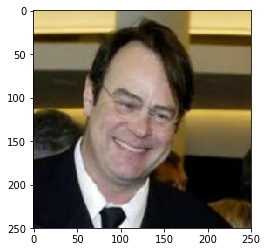

...but I have to admit that face reminds me of a Petit basset griffon vendeen

That's not a doggo!


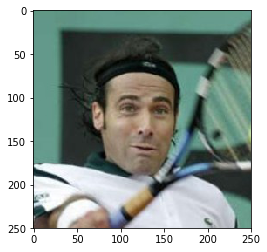

...but I have to admit that face reminds me of a Dachshund

That's not a doggo!


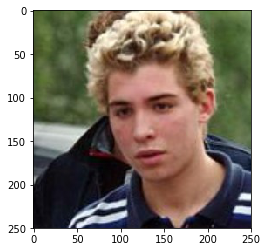

...but I have to admit that face reminds me of a Affenpinscher

Awww look at that cute doggo!


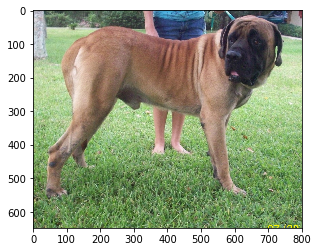

It looks like a Mastiff to me! Am I Right?

Awww look at that cute doggo!


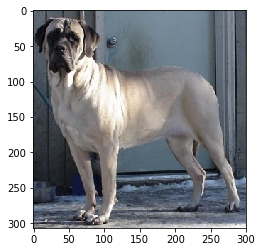

It looks like a Mastiff to me! Am I Right?

Awww look at that cute doggo!


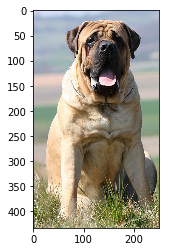

It looks like a Chinese shar-pei to me! Am I Right?


In [30]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)